# 주요 질병 사망자 및 보건 환경 비교 분석  
(Comparative Analysis of Major Disease Deaths and Health Environment)
## 1. 소개
국가별 의료 관련 데이터들을 이용해, 국가별, 연간 질병 사망자 수와 의료 인프라 간의 관계를 분석해보고 시각화를 해본 프로젝트

## 2. 목표
- 각 데이터의 EDA와 시각화
- 비슷한 분류의 데이터를 하나로 합치기
- 의료 인프라와 질병 사망자 수 관계 찾기 및 분석

## 3. 데이터 셋
- [KOSIS 10만명당 주요사망원인별 사망률](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의료종사자수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건관련 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 보건서비스 지출비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 판매](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 의약품 소비](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)
- [KOSIS 공공사회복지 지출](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC13&vw_cd=MT_RTITLE&list_id=101_003_E&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_RTITLE)

## 4. 구현

#### 라이브러리

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import cufflinks as cf
import folium

#### 한글 폰트 설정

In [2]:
from IPython.display import set_matplotlib_formats

def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

plt.style.use("ggplot")

font_family = get_font_family()
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)

set_matplotlib_formats("retina")

C:\Users\spec3\AppData\Local\Temp/ipykernel_25120/2328754805.py:32: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [3]:
# 모든 데이터 공통 국가
country_intersection = ['룩셈부르크',  '네덜란드',  '영국',  '이탈리아',  '캐나다',  '오스트레일리아',  '한국',  '일본',  '스페인',  '헝가리',  '독일',  '에스토니아',  '그리스',  '슬로바키아',  '핀란드',  '벨기에',  '체코',  '슬로베니아',  '프랑스',  '스웨덴',  '노르웨이',  '뉴질랜드',  '라트비아',  '덴마크',  '오스트리아',  '포르투갈',  '아일랜드',  '아이슬란드']

### 1. 주요 사망 원인별 사망률

### 2. 의료 종사자 수

#### Data Load

In [4]:
glob.glob("data/*")

['data\\의료종사자수.csv']

In [5]:
# Number of medical workers
df_Nmw = pd.read_csv("data/의료종사자수.csv", encoding="cp949")
df_Nmw.shape

(5820, 4)

In [6]:
df_Nmw.sample(5)

,국가별,시점,항목,데이터
3812,룩셈부르크,2005,의사,1186.0
888,북아메리카,2008,치과의사,NaN
4062,노르웨이,2003,약사,2311.0
1589,유럽,2005,- 천명당 의사,NaN
3134,헝가리,2019,의사,34137.0


#### 전처리 및 초기 분석

##### 기본 정보 확인

In [7]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가별     5820 non-null   object 
 1   시점      5820 non-null   int64  
 2   항목      5820 non-null   object 
 3   데이터     4900 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 182.0+ KB


4개의 컬럼을 가지고 있습니다.  
`국가별`은 `국가`로, `시점`은 `연도` / 타입은 `uint16`, `항목`은 `직업`으로, `데이터`는 `수`로 변경해줍니다.

In [8]:
col = ["국가", "연도", "직업", "수"]
df_Nmw.columns = col
df_Nmw["연도"] = df_Nmw["연도"].astype("uint16").copy()

In [9]:
df_Nmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      5820 non-null   object 
 1   연도      5820 non-null   uint16 
 2   직업      5820 non-null   object 
 3   수       4900 non-null   float64
dtypes: float64(1), object(2), uint16(1)
memory usage: 147.9+ KB


##### 결측치

In [10]:
df_Nmw.isnull().sum()

국가      0
연도      0
직업      0
수     920
dtype: int64

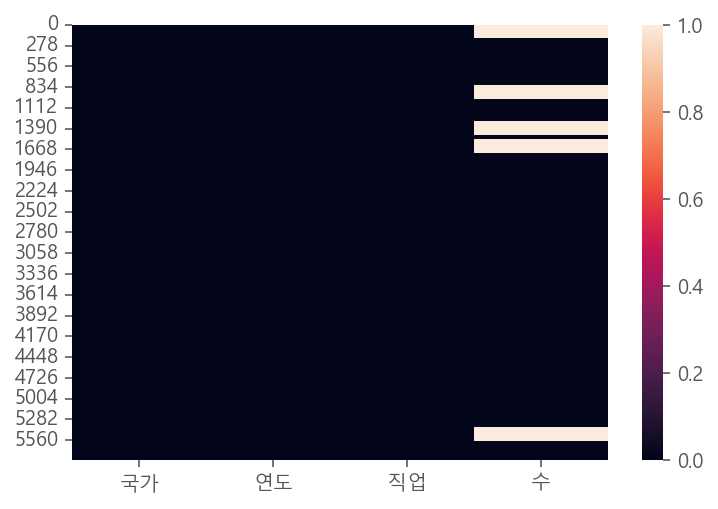

In [11]:
_ = sns.heatmap(data=df_Nmw.isnull())

##### 중복값

In [12]:
df_Nmw.duplicated().sum()

0

##### 필요없는 데이터 버리기
직업에서 천명당 의사/약사/치과의사 등은 필요없기때문에, 해당 행은 버려줍니다.

In [54]:
df_Nmw = df_Nmw[~df_Nmw["직업"].str.contains("천명당")].copy()
df_Nmw = df_Nmw.reset_index(drop=True).copy()
df_Nmw.shape

(2910, 4)

사용하는 데이터에서 다음과 같은 국가들만 공통으로 들어있기 때문에,  
모든 데이터를 합쳐 분석하기 위해 공통 국가들만 있는 데이터를 새롭게 생성합니다.

In [14]:
df_Nmw_inter = df_Nmw[df_Nmw["국가"].isin(country_intersection)]
df_Nmw_inter = df_Nmw_inter.reset_index(drop=True).copy()
df_Nmw_inter.shape

(1829, 4)

#### EDA 및 시각화
#### 1. 기존 데이터셋 (df_Nmw)

##### 기초 기술 통계

In [15]:
# 수치 데이터 기술 통계 (describe)
df_Nmw.describe()

,연도,수
count,2910.000000,2.450000e+03
mean,2009.003436,1.535792e+05
std,6.321945,3.865644e+05
min,1998.000000,1.490000e+02
25%,2004.000000,5.453500e+03
50%,2009.000000,2.525150e+04
75%,2014.000000,9.436650e+04
max,2020.000000,4.445047e+06


1998년부터 2020년까지의 데이터 입니다.

In [16]:
# 범주 데이터 기술 통계
df_Nmw.describe(include="object")

,국가,직업
count,2910,2910
unique,45,4
top,아시아,의사
freq,92,848


##### 분석과 시각화
### df_NmW

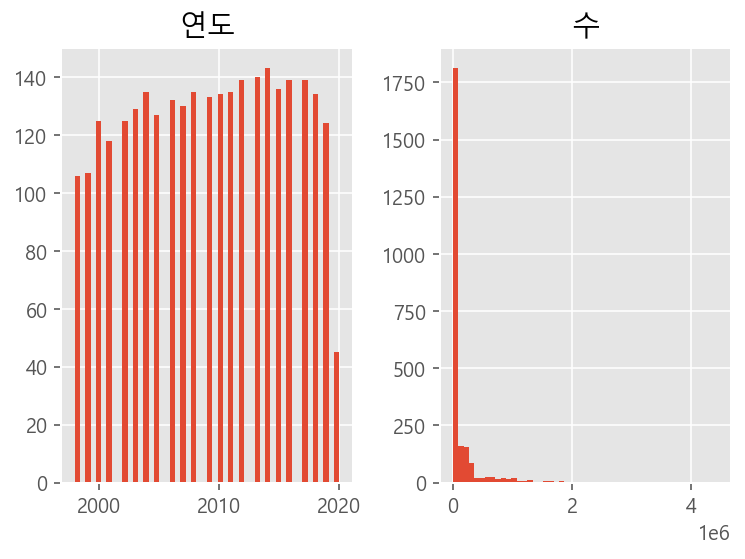

In [17]:
_ = df_Nmw.hist(bins=50)

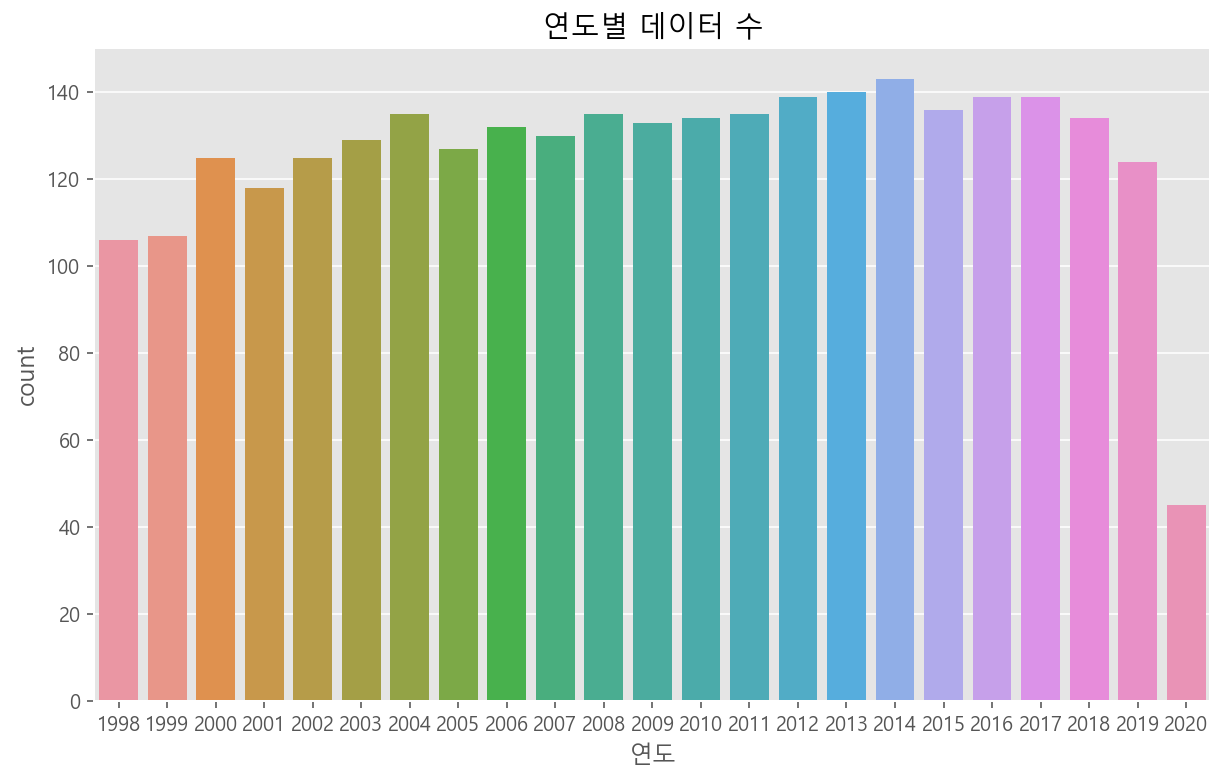

In [18]:
plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df_Nmw, x="연도").set_title("연도별 데이터 수")

2020년도 데이터가 유독적은 것을 확인 할 수 있습니다.  
2021년 9월까지 집계한 데이터인데 원인을 찾아보겠습니다.

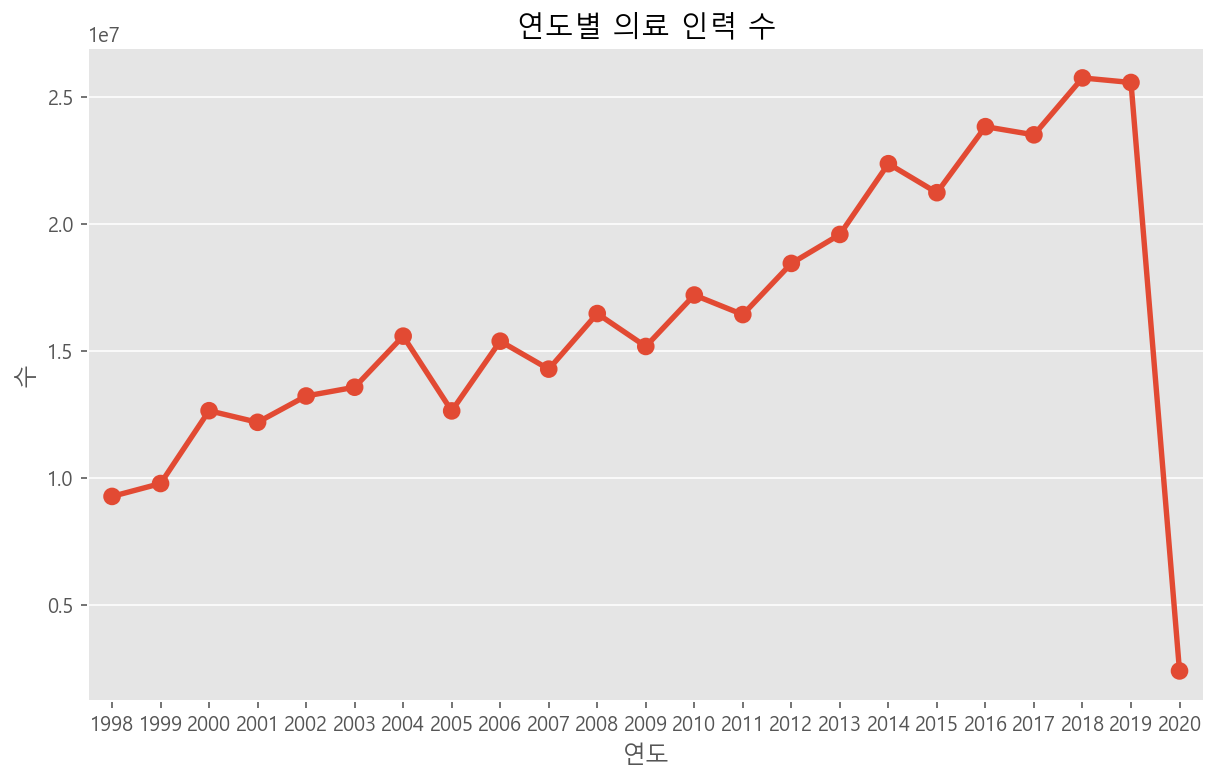

In [19]:
# 연도별 의료 인력 수
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw, x="연도", y="수", estimator=np.sum, ci=None).set_title("연도별 의료 인력 수")

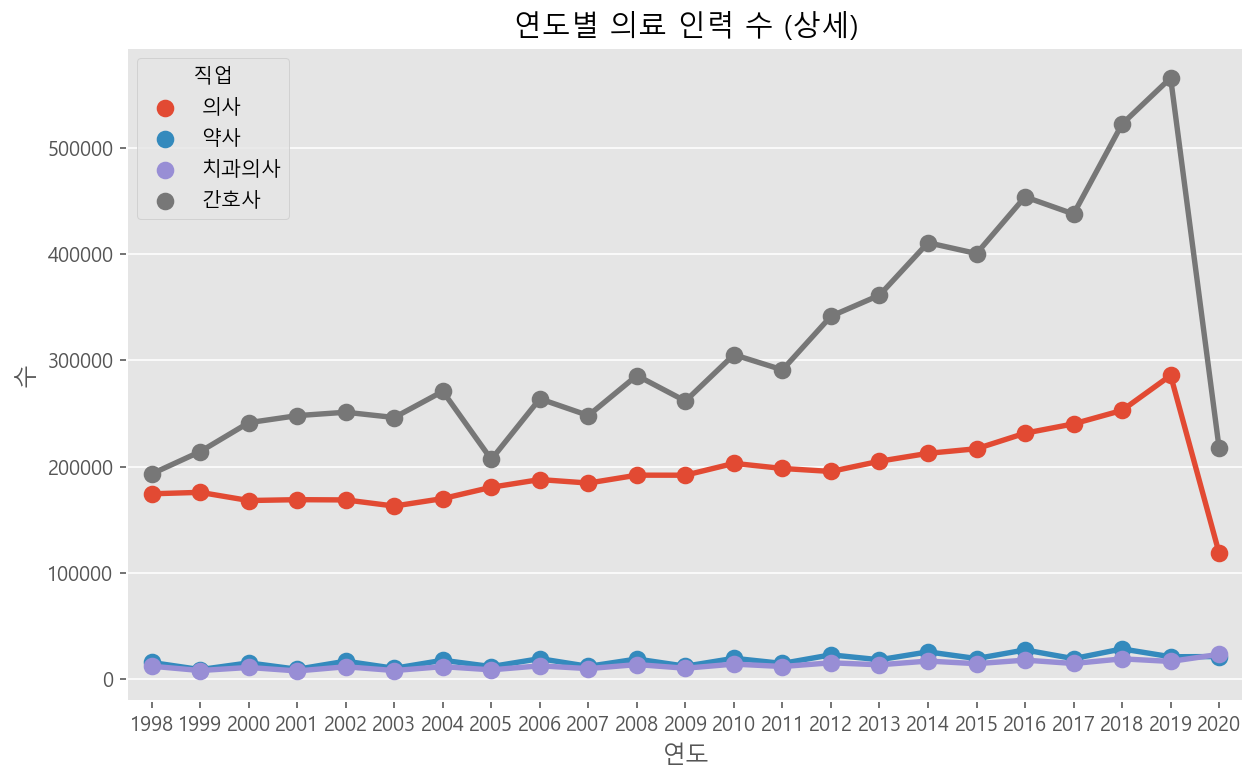

In [20]:
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw, x="연도", y="수", hue="직업", ci=None).set_title("연도별 의료 인력 수 (상세)")

연도별로 치과의사와 약사의 변동률은 크게 없지만, 2019년에서 2020년 사이의 의사와 간호사의 변동률이 굉장히 큽니다.  
코로나 팬데믹으로 인해, 의료 종사자들이 많이 관뒀다는 기사는 많이 접했지만 변동폭이 너무 커 **연도별 데이터 집계 대상**의 차이가 있을꺼 같다는 생각을 했습니다. 


In [21]:
year_country = pd.crosstab(df_Nmw["연도"], df_Nmw["국가"])
year_country.iplot(kind="bar", title="연도별 집계 국가와 대상 직업군")

Text(0.5, 1.0, '국가별 집계 횟수')

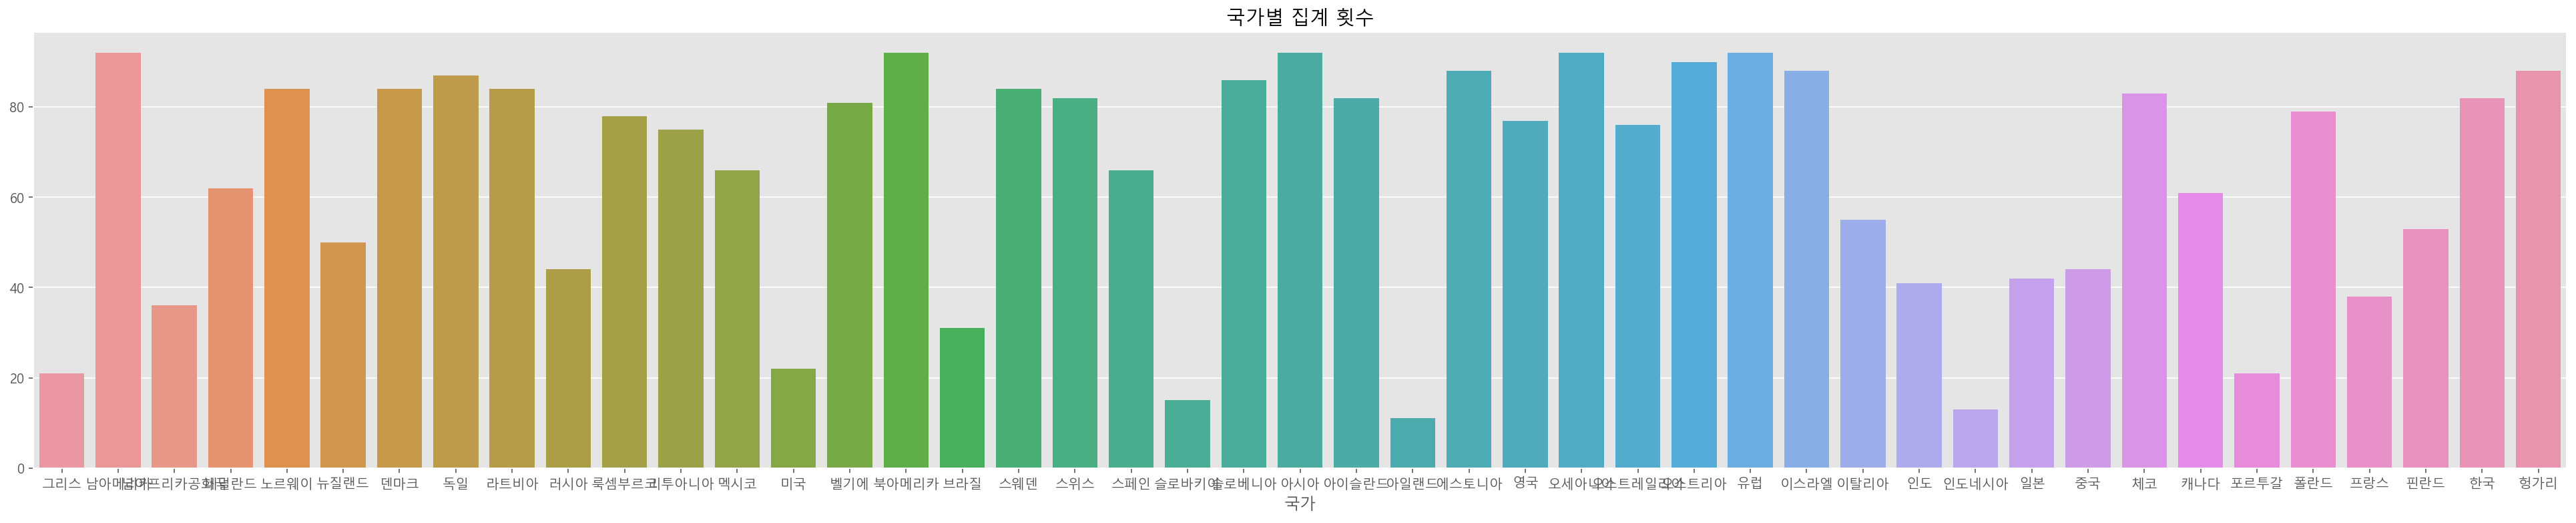

In [22]:
plt.figure(figsize=(34, 6))
sns.barplot(data=year_country, estimator=np.sum, ci=None).set_title("국가별 집계 횟수")

국가별로 집계 횟수와 조사한 의사의 직군이 다릅니다.  
최종적으로는, 모든 데이터에서 공통적으로 가지고 있는 국가들에 대한 데이터만 필요하기때문에, 이미 전처리가 된 데이터로 넘어가서 다시 분석해보겠습니다.

#### 2. 공통 국가 데이터 셋 (df_Nmw_inter)
### df_Nmw_inter

##### 기초 기술 통계

In [23]:
# 수치 데이터 기술 통계 (describe)
df_Nmw_inter.describe()

,연도,수
count,1829.000000,1.829000e+03
mean,2009.135593,7.380114e+04
std,6.233529,1.573833e+05
min,1998.000000,1.490000e+02
25%,2004.000000,4.685000e+03
50%,2009.000000,1.710700e+04
75%,2014.000000,6.697400e+04
max,2020.000000,1.487444e+06


In [24]:
# 범주 데이터 기술 통계
df_Nmw_inter.describe(include="object")

,국가,직업
count,1829,1829
unique,28,4
top,오스트리아,의사
freq,90,501


#### 결측치

In [25]:
df_Nmw_inter.isnull().sum()

국가    0
연도    0
직업    0
수     0
dtype: int64

`df_Nmw_inter`는 `df_Nmw`에서 일부 국가가 빠진 데이터이기 때문에 범주 데이터에 대한 기술 통계가 조금 다릅니다.

##### 분석과 시각화

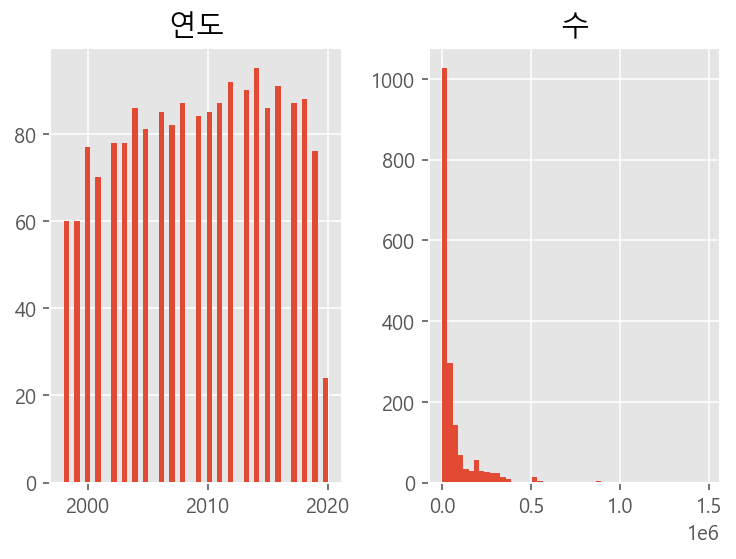

In [26]:
_ = df_Nmw_inter.hist(bins=50)

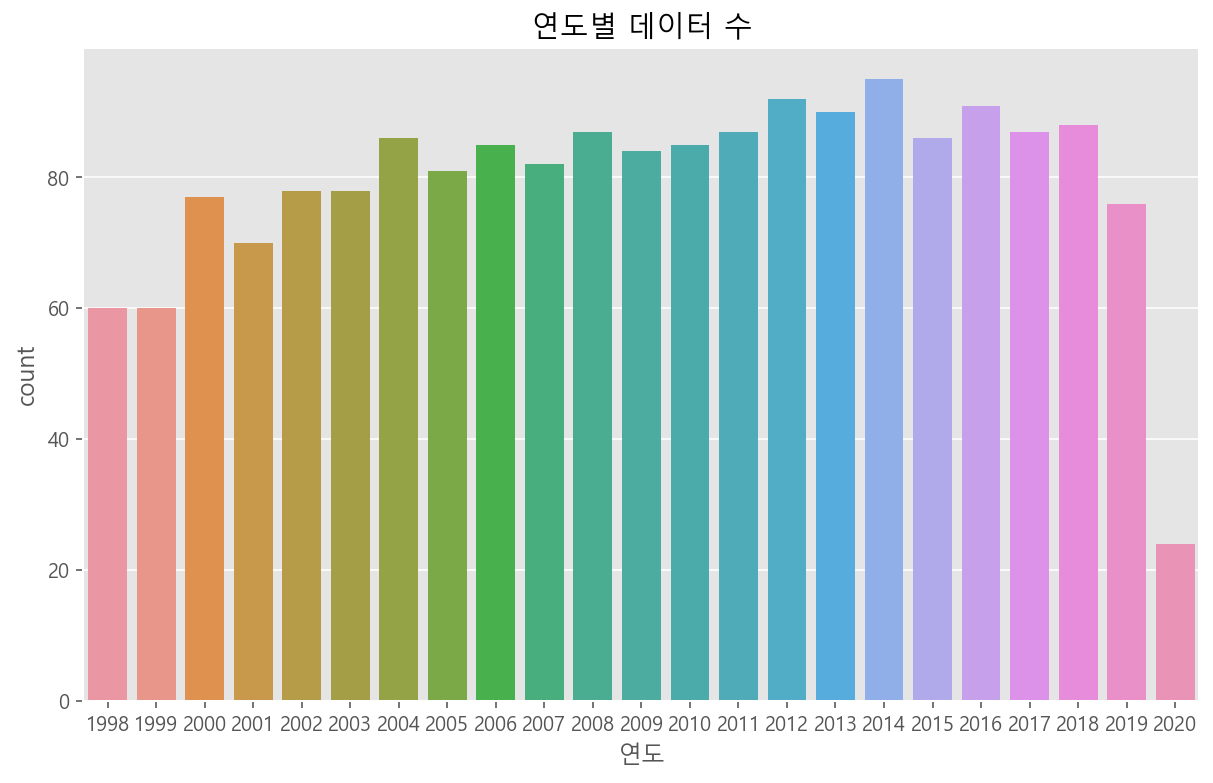

In [27]:
plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df_Nmw_inter, x="연도").set_title("연도별 데이터 수")

일부 국가가 제외됬지만, 여전히 비슷한 문제를 가지고 있는거 같습니다.

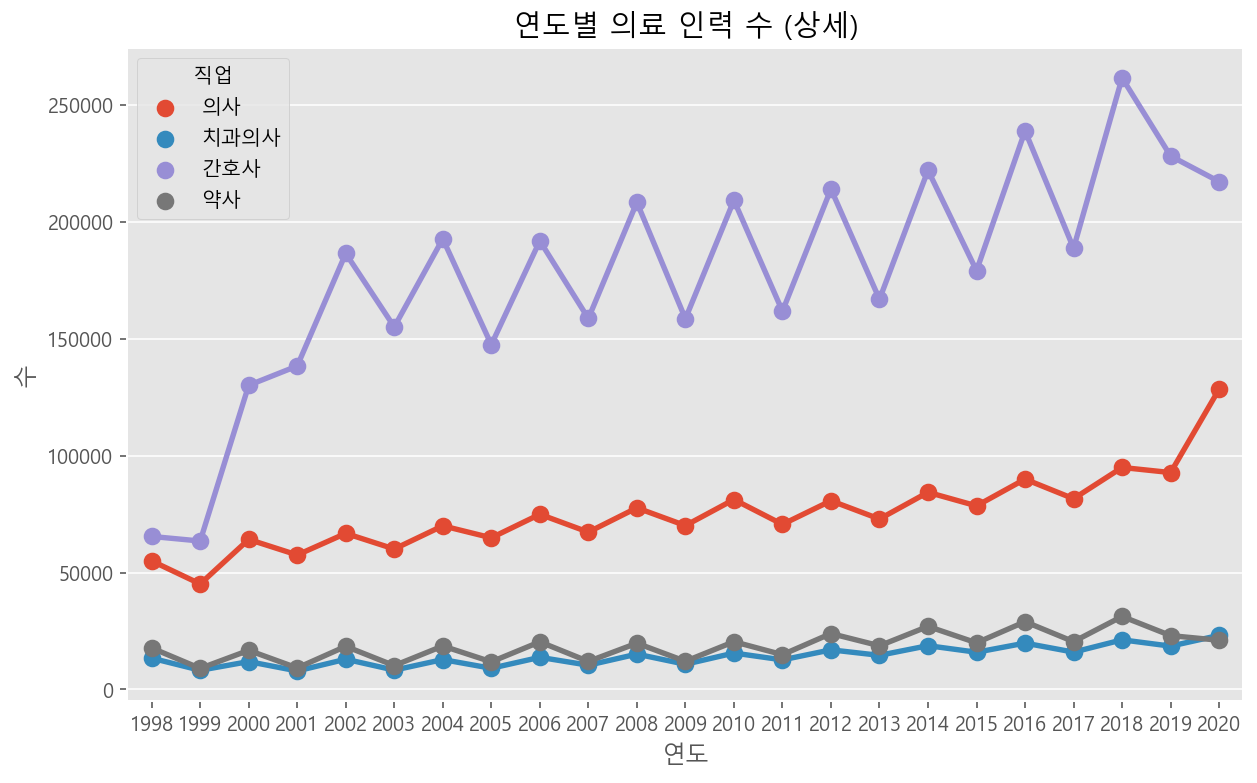

In [28]:
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw_inter, x="연도", y="수", hue="직업", ci=None).set_title("연도별 의료 인력 수 (상세)")

이전보다는 안정적으로 변했지만, 여전히 연도별 집계된 국가나 데이터에 차이가 크다는 생각이 듭니다.  
해당 문제는 추후에 다시 다루도록 하겠습니다.


In [29]:
px.line(data_frame=df_Nmw_inter, x="연도", y="수", facet_col="직업", color="국가", title="직업군별 추이")

### df_Nmw_always

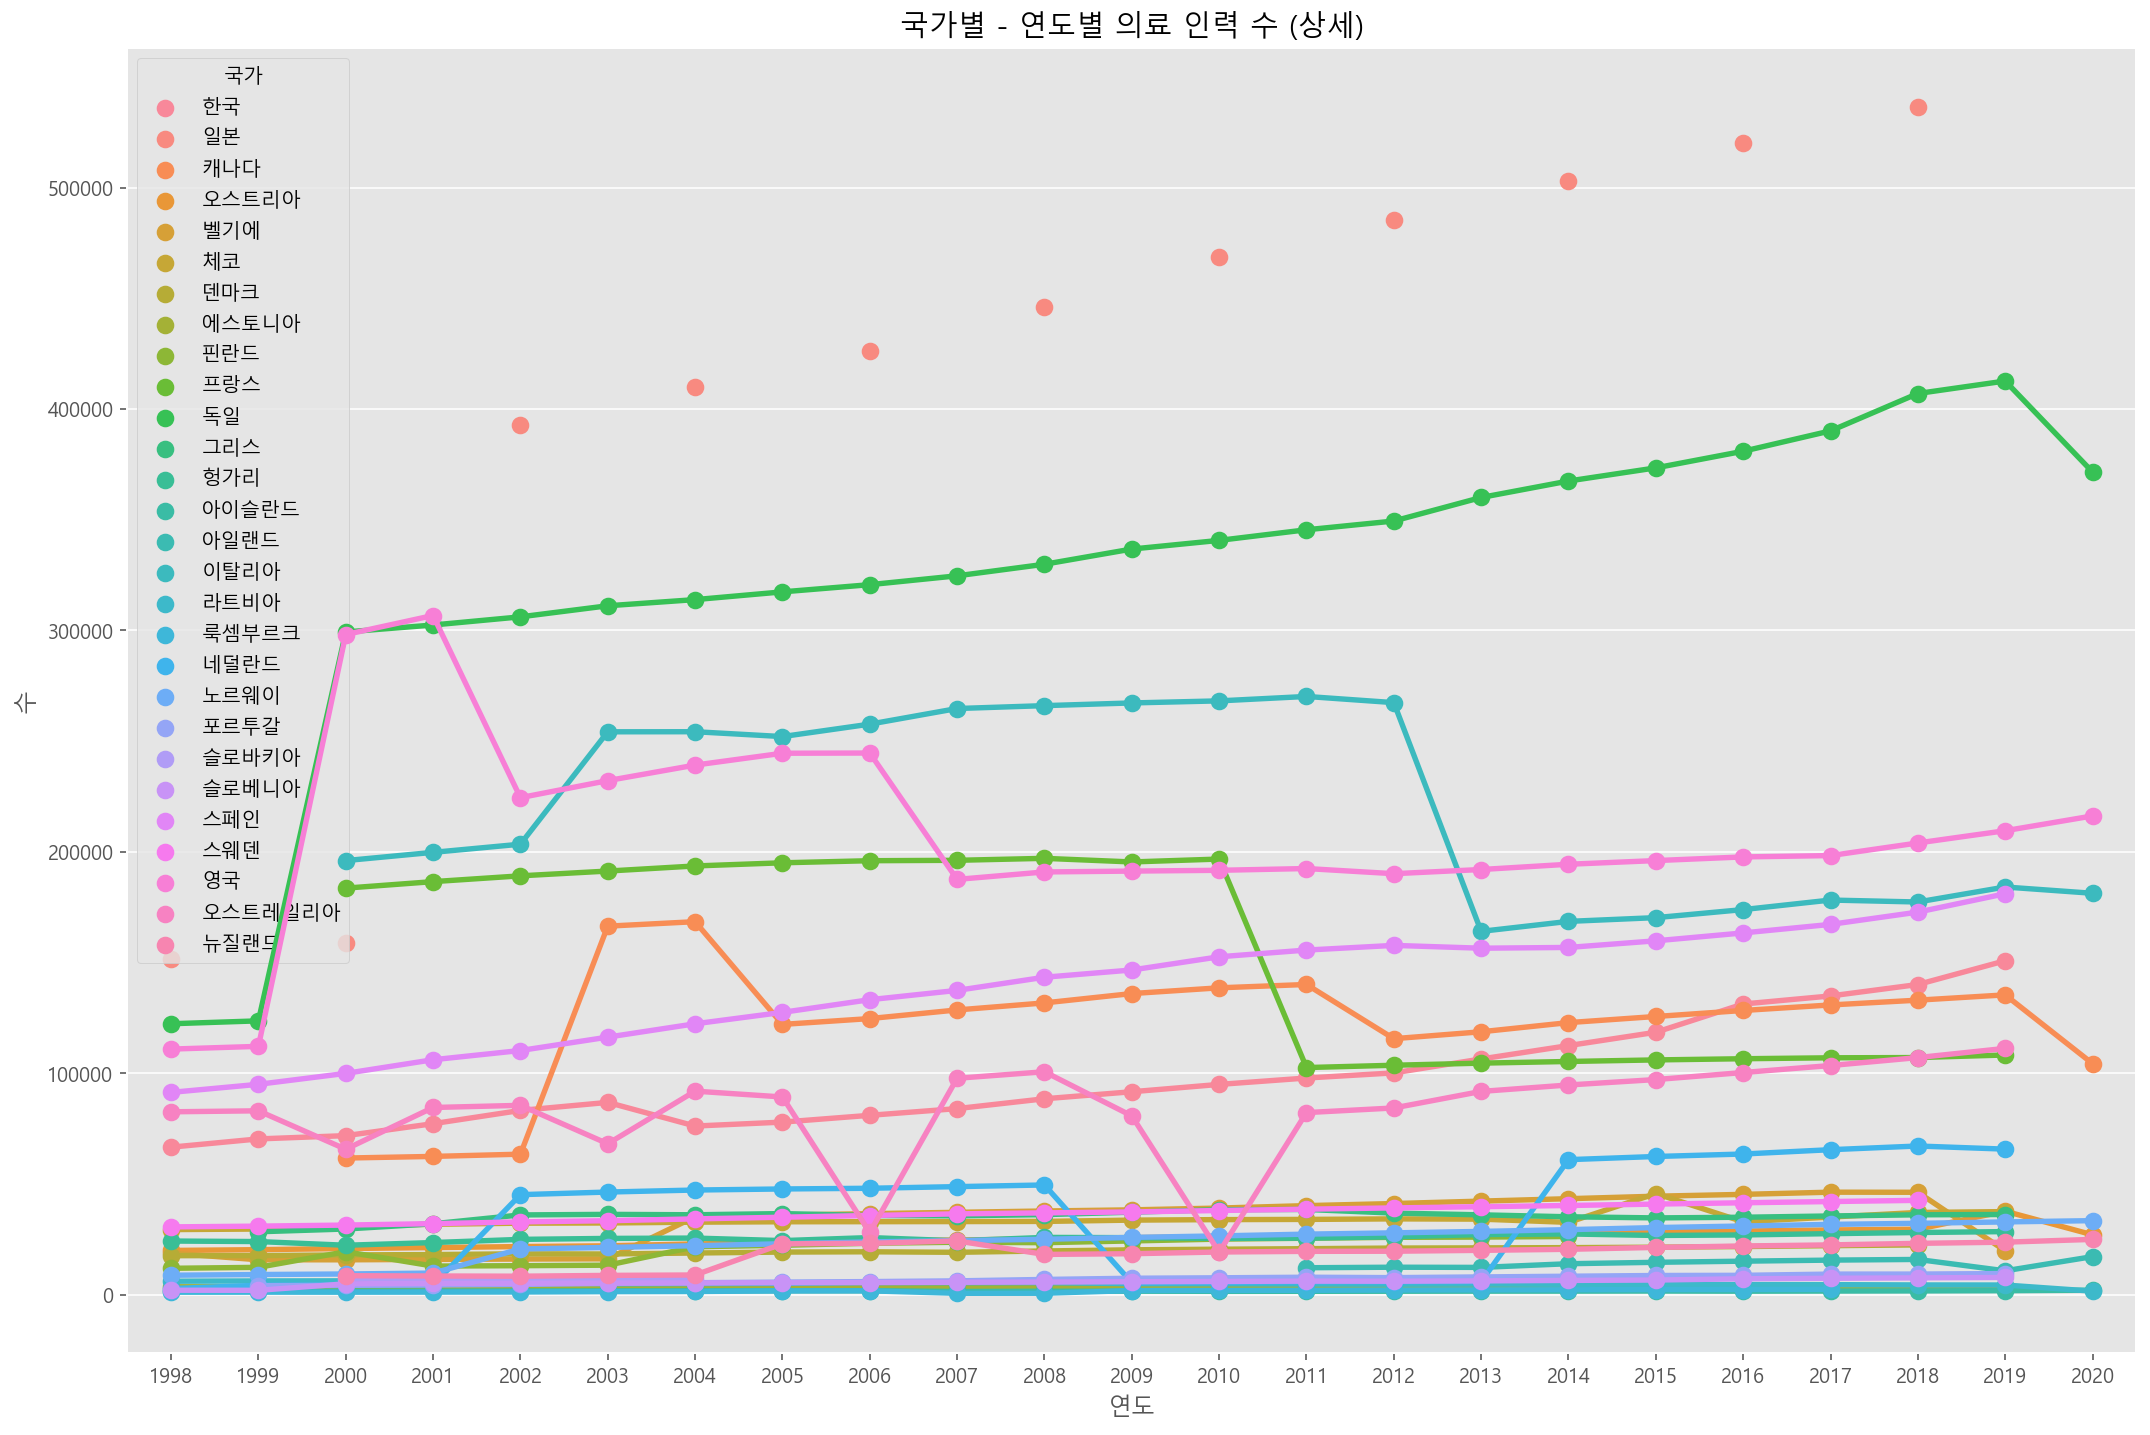

In [30]:
plt.figure(figsize=(18, 12))
_ = sns.pointplot(data=df_Nmw_inter, x="연도", y="수", hue="국가", ci=None).set_title("국가별 - 연도별 의료 인력 수 (상세)")

In [31]:
pd.pivot_table(data=df_Nmw_inter, index="연도", columns="국가", values="직업", aggfunc="count").iplot(kind="bar", xTitle="연도", yTitle="집계 직업 종류 수", title="연도별 국가 집계 대상 정보")

연도별로, 국가별로 수집된 데이터의 수가 다르다는걸 위 두개의 그래프를 이용해 확인할 수 있습니다.  
매년 수집된 국가들을 찾아보겠습니다.

In [32]:
group_yc = df_Nmw_inter.groupby("연도", as_index=False)["국가"].value_counts()
group_yc

,연도,국가,count
0,1998,헝가리,4
1,1998,체코,4
2,1998,오스트리아,4
3,1998,에스토니아,4
4,1998,스웨덴,4
...,...,...,...
561,2020,오스트리아,2
562,2020,독일,1
563,2020,아일랜드,1
564,2020,라트비아,1


In [33]:
# 굉장히 멍청한 방법인거 같음...
temp = []

for _ in range(len(group_yc["연도"].unique())):
    temp.append(set(group_yc[group_yc["연도"]==group_yc["연도"].unique()[_]]["국가"].values))
    
always = set(temp[0])
for _ in range(1, len(temp)):
    always = always & temp[_]

In [34]:
len(always), always

(6, {'노르웨이', '독일', '라트비아', '아이슬란드', '영국', '오스트리아'})

1998년부터 2020년까지 매년 수집된 국가는 총 6개 국가입니다.  
해당 국가들만 가진 데이터 셋을 만듭니다.

In [35]:
df_Nmw_always = df_Nmw_inter[df_Nmw_inter["국가"].isin(always)]
df_Nmw_always = df_Nmw_always.reset_index(drop=True).copy()

In [36]:
df_Nmw_always

,국가,연도,직업,수
0,오스트리아,1998,의사,30110.0
1,오스트리아,1998,약사,4337.0
2,오스트리아,1998,치과의사,3624.0
3,오스트리아,1998,간호사,42013.0
4,오스트리아,1999,의사,30115.0
...,...,...,...,...
499,영국,2019,간호사,547661.0
500,영국,2020,의사,203529.0
501,영국,2020,약사,57218.0
502,영국,2020,치과의사,36394.0


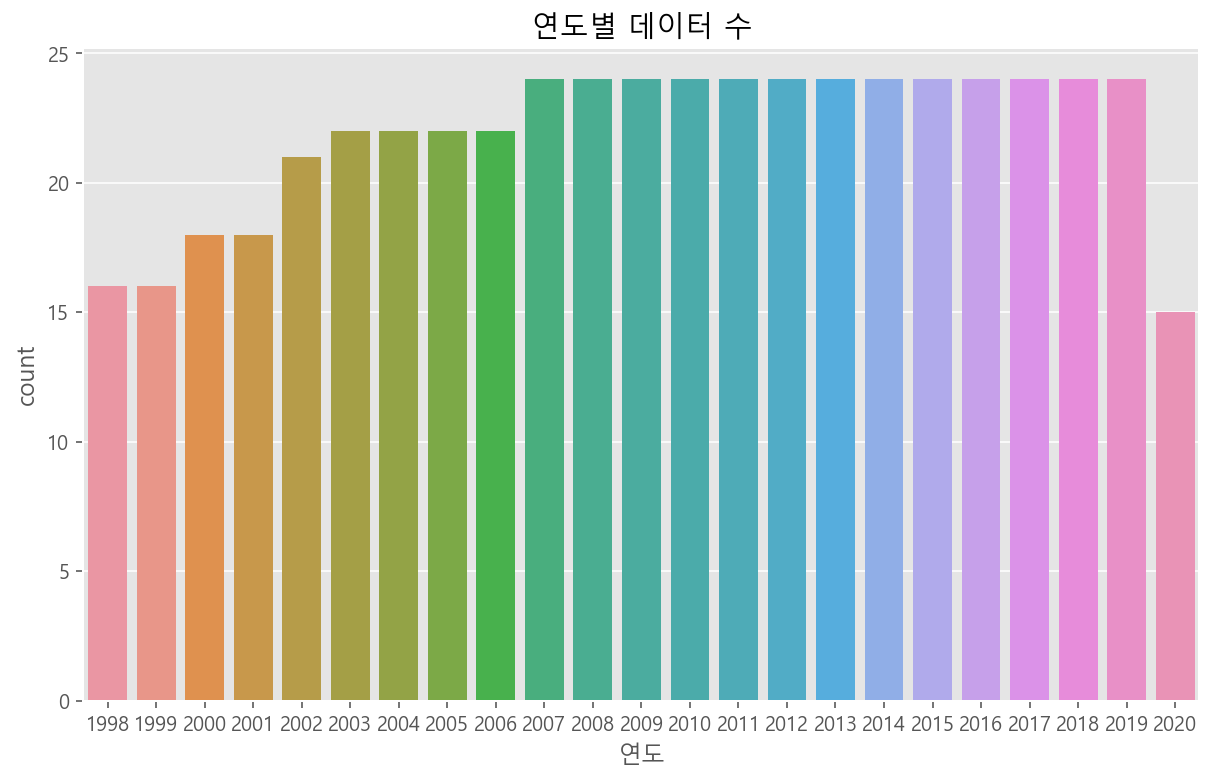

In [37]:
plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df_Nmw_always, x="연도").set_title("연도별 데이터 수")

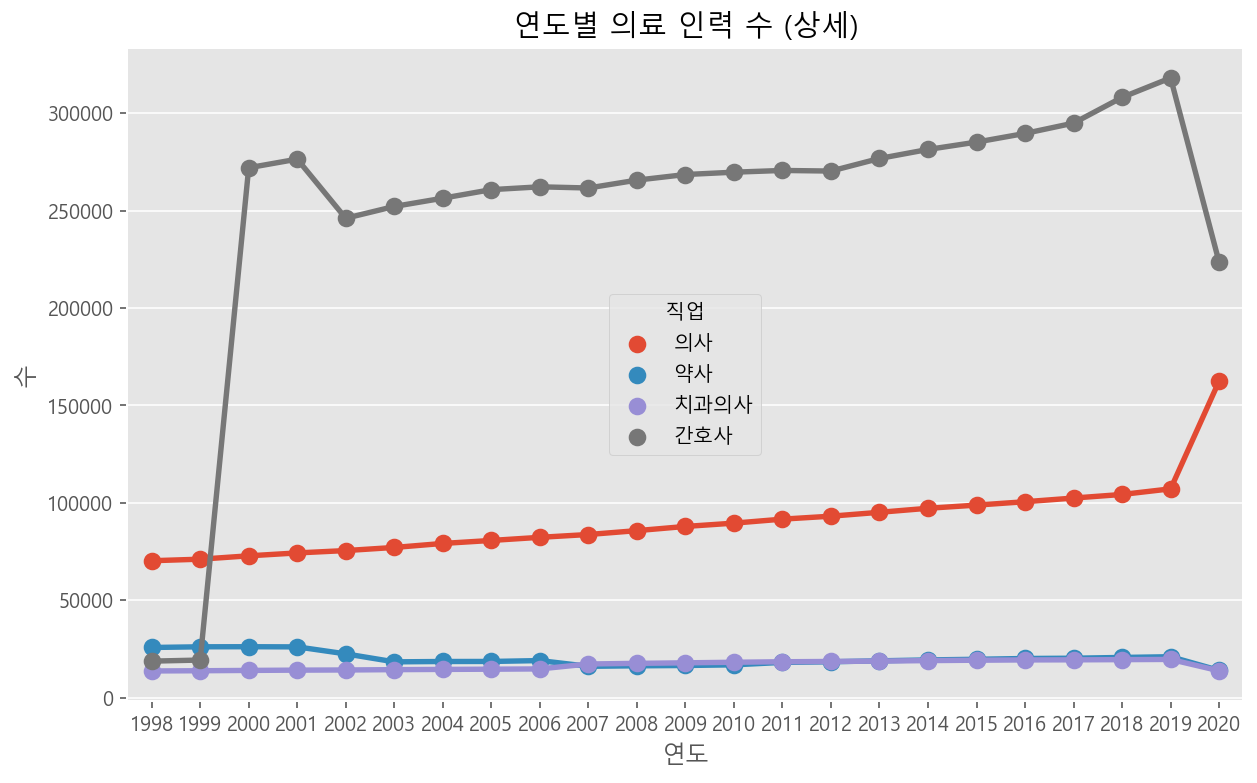

In [38]:
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw_always, x="연도", y="수", hue="직업", ci=None).set_title("연도별 의료 인력 수 (상세)")

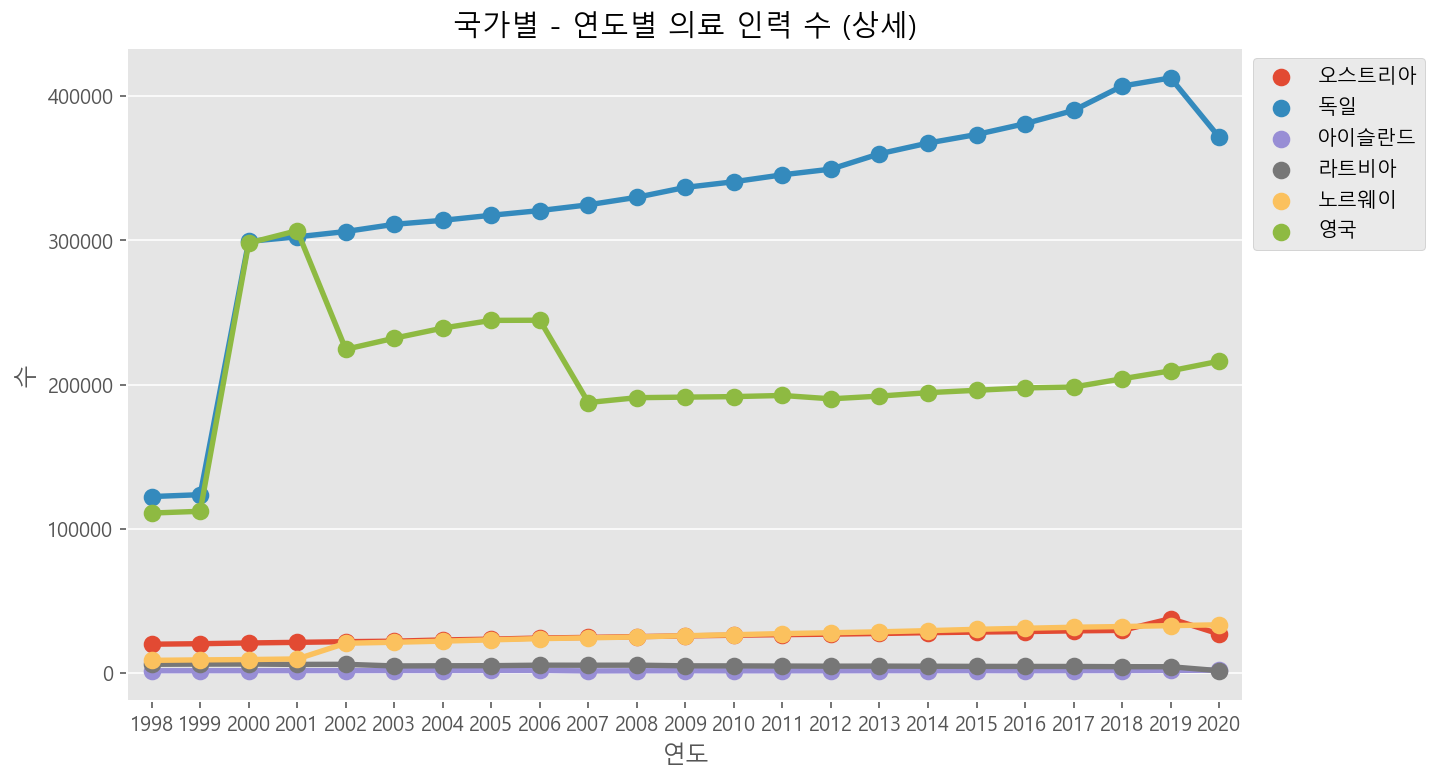

In [39]:
plt.figure(figsize=(10, 6))
_ = sns.pointplot(data=df_Nmw_always, x="연도", y="수", hue="국가", ci=None).set_title("국가별 - 연도별 의료 인력 수 (상세)")
_ = plt.legend(bbox_to_anchor=[1, 1])

In [40]:
px.line(data_frame=df_Nmw_always, x="연도", y="수", facet_col="직업", color="국가", title="직업군별 추이")

### 지역 시각화
`folium`을 이용해 지도로 시각화해봅니다.  
먼전 데이터에 국가명을 영어 표기 형식으로 전환한 컬럼을 추가합니다.  
한영 전환은 `googletrans`를 이용했습니다.

In [80]:
from googletrans import Translator
import time
translator = Translator()

In [96]:
def kor2eng(list_of_country):
    temp = []
    for _ in list_of_country:
        temp.append(translator.translate(_).text.lower())
        time.sleep(0.5)
    return temp

In [108]:
dict_kor2eng = {}
list_kor2eng = kor2eng(df_Nmw["국가"].unique())

for kor, eng in zip(df_Nmw["국가"].unique(), list_kor2eng):
    dict_kor2eng[kor] = eng


In [113]:
df_Nmw["국가영문"] = df_Nmw["국가"].apply(lambda country: dict_kor2eng[country])

In [114]:
df_Nmw

,국가,연도,직업,수,국가영문
0,아시아,1998,의사,NaN,asia
1,아시아,1998,약사,NaN,asia
2,아시아,1998,치과의사,NaN,asia
3,아시아,1998,간호사,NaN,asia
4,아시아,1999,의사,NaN,asia
...,...,...,...,...,...
2905,뉴질랜드,2019,약사,3489.0,new zealand
2906,뉴질랜드,2019,간호사,50976.0,new zealand
2907,뉴질랜드,2020,의사,17448.0,new zealand
2908,뉴질랜드,2020,약사,3652.0,new zealand


### 3. 보건 관련/서비스 지출

### 4. 의약품 판매/소비

### 5. 공공 사회 복지 지출

## 5. 종합